## EDA

In [1]:
import os
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import datetime
from datetime import timedelta

In [2]:
path = os.getcwd()
path

'/Users/simizicee/Dropbox/2021 Spring/ACE 592 SAE/Final project'

### 1. Plot volume of collected tweets

In [3]:
# read raw tweet (80k observation a day) and concatenate them into one df
all_files = glob.glob(path + "/data/202105*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col = None, header = 0)
    temp = df[ :20000] # we only have the chance to work on first 20k observations
    li.append(temp)

frame = pd.concat(li, axis=0, ignore_index = True)

In [4]:
# sort data by time stamp
df = frame.sort_values("tweetcreatedts") 

# convert UTC time to New Zealand time zone
# df['timestamp_NZ'] = pd.to_datetime(df['tweetcreatedts']) + timedelta(hours = 13)

# convert timestamp to the hour
df['date_min'] = df.tweetcreatedts.apply(lambda x:  str(x)[:16]) 
df['date_min'] = pd.to_datetime(df.date_min)

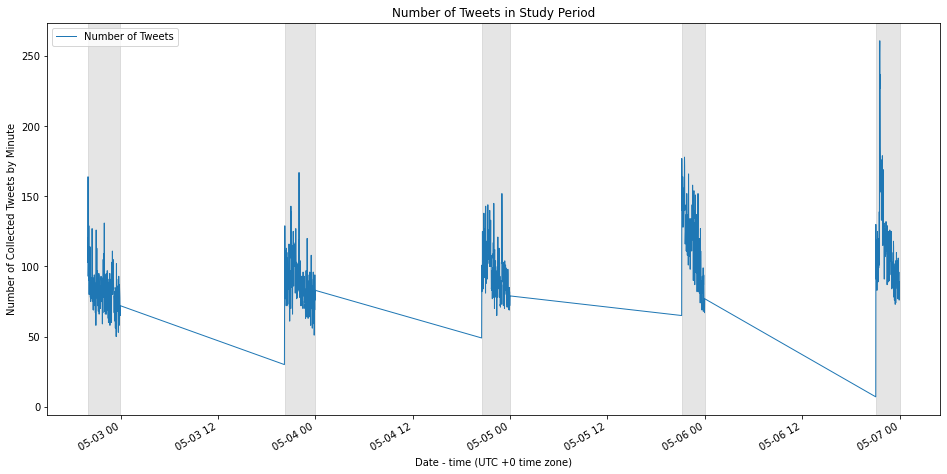

In [5]:
# Plot volumn of tweets in sample over time
f, a = plt.subplots(figsize = (16, 8))
df.date_min.value_counts().sort_index().plot(ax = a, label = "Number of Tweets", lw = 1)

# annotate sample period
plt.axvspan("2021-05-02 19:59:05", "2021-05-02 23:59:57", color = "grey", alpha = 0.2)
plt.axvspan("2021-05-03 20:12:39", "2021-05-03 23:59:58", color = "grey", alpha = 0.2)
plt.axvspan("2021-05-04 20:30:26", "2021-05-04 23:59:59", color = "grey", alpha = 0.2)
plt.axvspan("2021-05-05 21:09:33", "2021-05-05 23:59:58", color = "grey", alpha = 0.2)
plt.axvspan("2021-05-06 21:04:55", "2021-05-06 23:59:59", color = "grey", alpha = 0.2)

plt.legend()
a.set(xlabel = "Date - time (UTC +0 time zone)",
      ylabel = "Number of Collected Tweets by Minute",
      title = "Number of Tweets in Study Period");

### 2. Graph time series using merged data

In [6]:
df = pd.read_csv("data/final_all_data.csv")
del df['Unnamed: 0']

In [7]:
df.head(5)

,sentiment_score,timestamp,NZX50_index,bitcoin_usd,ethereum_usd,doge_usd
0,0.187181,2021-05-03 22:00:00,12773.44043,57132.69531,3331.681641,0.440406
1,0.200594,2021-05-03 22:01:00,12775.54980,57187.79688,3341.330078,0.438437
2,0.245754,2021-05-03 22:02:00,12777.66016,57189.14844,3337.081299,0.435421
3,0.219911,2021-05-03 22:03:00,12776.98047,57163.38281,3337.825684,0.437605
4,0.204912,2021-05-03 22:04:00,12778.41992,57107.67188,3338.871338,0.436978


In [8]:
# sort data by time stamp
df = df.sort_values("timestamp") 

# convert UTC time to New Zealand time zone
df['timestamp_NZ'] = pd.to_datetime(df['timestamp']) + timedelta(hours = 13)

In [9]:
## aggregate by the hour
# df['date_hour'] = df.timestamp_NZ.apply(lambda x:  str(x)[:13]) # create time to the hour
# df['date_hour'] = pd.to_datetime(df.date_hour)

# temp = df.groupby("date_hour")['sentiment_score'].mean()
# temp = temp.to_frame().reset_index()

# df = df.merge(temp, on = 'date_hour', suffixes=('', '_hour'))

In [10]:
## aggreagate variables by 5 minutes
df['date_quater'] = df['timestamp_NZ'].dt.round('5min') # round time to nearest 5 minute

temp = df.groupby("date_quater")['sentiment_score'].mean().to_frame().reset_index()
# temp = df.resample('15T', on = 'timestamp_NZ').sentiment_score.mean().to_frame().reset_index()
df = df.merge(temp, how = 'left', on = 'date_quater', suffixes=('', '_quat'))

temp = df.groupby("date_quater")['bitcoin_usd'].mean().to_frame().reset_index()
df = df.merge(temp, how = 'left', on = 'date_quater', suffixes=('', '_quat'))

In [11]:
df

,sentiment_score,timestamp,NZX50_index,bitcoin_usd,ethereum_usd,doge_usd,timestamp_NZ,date_quater,sentiment_score_quat,bitcoin_usd_quat
0,0.187181,2021-05-03 22:00:00,12773.44043,57132.69531,3331.681641,0.440406,2021-05-04 11:00:00,2021-05-04 11:00:00,0.211176,57169.880210
1,0.200594,2021-05-03 22:01:00,12775.54980,57187.79688,3341.330078,0.438437,2021-05-04 11:01:00,2021-05-04 11:00:00,0.211176,57169.880210
2,0.245754,2021-05-03 22:02:00,12777.66016,57189.14844,3337.081299,0.435421,2021-05-04 11:02:00,2021-05-04 11:00:00,0.211176,57169.880210
3,0.219911,2021-05-03 22:03:00,12776.98047,57163.38281,3337.825684,0.437605,2021-05-04 11:03:00,2021-05-04 11:05:00,0.233456,57101.076564
4,0.204912,2021-05-03 22:04:00,12778.41992,57107.67188,3338.871338,0.436978,2021-05-04 11:04:00,2021-05-04 11:05:00,0.233456,57101.076564
...,...,...,...,...,...,...,...,...,...,...
459,0.181057,2021-05-06 23:55:00,12736.26953,56485.70313,3495.317383,0.583025,2021-05-07 12:55:00,2021-05-07 12:55:00,0.150337,56456.470314
460,0.143378,2021-05-06 23:56:00,12735.37988,56430.19531,3491.920410,0.582049,2021-05-07 12:56:00,2021-05-07 12:55:00,0.150337,56456.470314
461,0.132260,2021-05-06 23:57:00,12736.98047,56370.16016,3487.777344,0.581017,2021-05-07 12:57:00,2021-05-07 12:55:00,0.150337,56456.470314
462,0.124734,2021-05-06 23:58:00,12739.67969,56358.05469,3486.069580,0.580412,2021-05-07 12:58:00,2021-05-07 13:00:00,0.117287,56377.285160


In [12]:
# prepare data for making figures
sent_ts = df.set_index("timestamp_NZ").sort_index()
sent_ts.index = sent_ts.index.map(str)

In [13]:
sent_ts.tail(5)

,sentiment_score,timestamp,NZX50_index,bitcoin_usd,ethereum_usd,doge_usd,date_quater,sentiment_score_quat,bitcoin_usd_quat
timestamp_NZ,,,,,,,,,
2021-05-07 12:55:00,0.181057,2021-05-06 23:55:00,12736.26953,56485.70313,3495.317383,0.583025,2021-05-07 12:55:00,0.150337,56456.470314
2021-05-07 12:56:00,0.143378,2021-05-06 23:56:00,12735.37988,56430.19531,3491.920410,0.582049,2021-05-07 12:55:00,0.150337,56456.470314
2021-05-07 12:57:00,0.132260,2021-05-06 23:57:00,12736.98047,56370.16016,3487.777344,0.581017,2021-05-07 12:55:00,0.150337,56456.470314
2021-05-07 12:58:00,0.124734,2021-05-06 23:58:00,12739.67969,56358.05469,3486.069580,0.580412,2021-05-07 13:00:00,0.117287,56377.285160
2021-05-07 12:59:00,0.109840,2021-05-06 23:59:00,12743.53027,56396.51563,3490.880371,0.580804,2021-05-07 13:00:00,0.117287,56377.285160


Plot sentiment score:

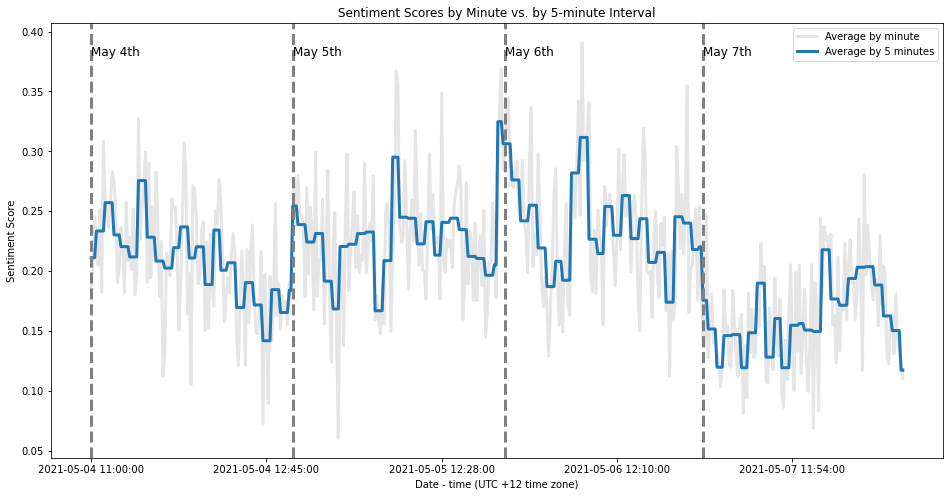

In [14]:
f, a = plt.subplots(figsize = (16, 8))
sent_ts['sentiment_score'].plot(alpha = .1, ax = a, color = "black", label = "Average by minute", lw = 3)
sent_ts['sentiment_score_quat'].plot(ax = a, label = "Average by 5 minutes",lw = 3)

# annotate dates in sample
plt.axvline(0, ls = "--", color = "grey", lw =  3)
a.text(0, 0.38, "May 4th", fontsize = 12)
plt.axvline(115, ls = "--", color = "grey", lw =  3)
a.text(115, 0.38, "May 5th", fontsize = 12)
plt.axvline(236, ls = "--", color = "grey", lw =  3)
a.text(236, 0.38, "May 6th", fontsize = 12)
plt.axvline(349, ls = "--", color = "grey", lw =  3)
a.text(349, 0.38, "May 7th", fontsize = 12);

plt.legend()
a.set(xlabel = "Date - time (UTC +12 time zone)",
      ylabel = "Sentiment Score",
      title = "Sentiment Scores by Minute vs. by 5-minute Interval");

Plot sentiment score with price data:

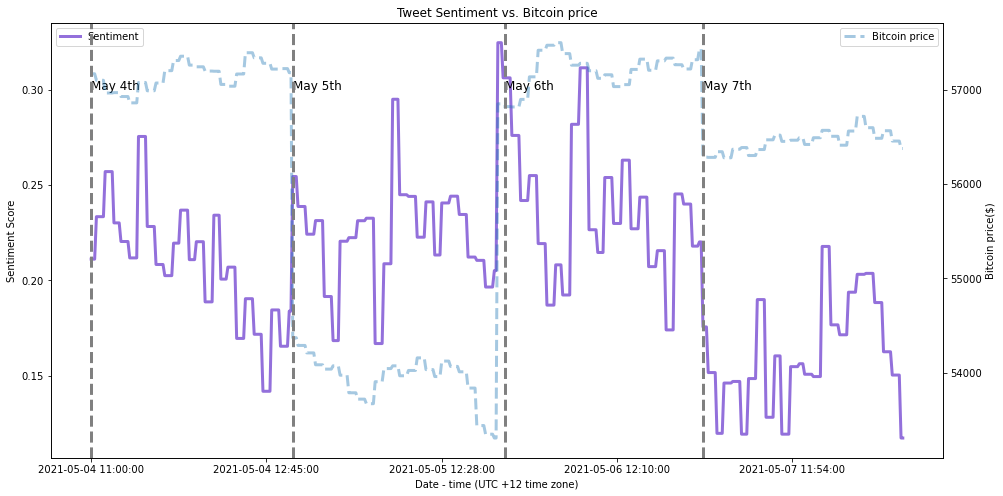

In [15]:
f, a = plt.subplots(figsize = (16, 8))
sent_ts['sentiment_score_quat'].plot(ax = a, color ='mediumpurple', label = "Sentiment",lw = 3)
plt.legend(loc = "upper left")
a2 = a.twinx()
sent_ts['bitcoin_usd_quat'].plot(ax = a2, linestyle="--", alpha = .4, label = "Bitcoin price", lw = 3)
plt.legend(loc = "upper right")

# annotate dates in sample
plt.axvline(0, ls = "--", color = "grey", lw =  3)
a.text(0, 0.3, "May 4th", fontsize = 12)
plt.axvline(115, ls = "--", color = "grey", lw =  3)
a.text(115, 0.3, "May 5th", fontsize = 12)
plt.axvline(236, ls = "--", color = "grey", lw =  3)
a.text(236, 0.3, "May 6th", fontsize = 12)
plt.axvline(349, ls = "--", color = "grey", lw =  3)
a.text(349, 0.3, "May 7th", fontsize = 12)

a.set(xlabel = "Date - time (UTC +12 time zone)",
       ylabel = "Sentiment Score",
       title = "Tweet Sentiment vs. Bitcoin price")
a2.set(ylabel = "Bitcoin price($)");